## Barplot of the Happiness of the Regions in the World and the Top Countries

#### Preperation 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df2015 = pd.read_csv("/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2015.csv")
df2016 = pd.read_csv("/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2016.csv")
df2017 = pd.read_csv("/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2017.csv")
df2018 = pd.read_csv("/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2018.csv")
df2019 = pd.read_csv("/Users/janik.sdt/Documents/Is-the-world-happy/Datasets/Raw Data/2019.csv")

#### Plots of the Happiness Score per Region

/var/folders/3f/n2rwh49d413bhwkgtvznx7qc0000gn/T/ipykernel_2390/2434219631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness Score', y='Region', data=df2015, palette='coolwarm')


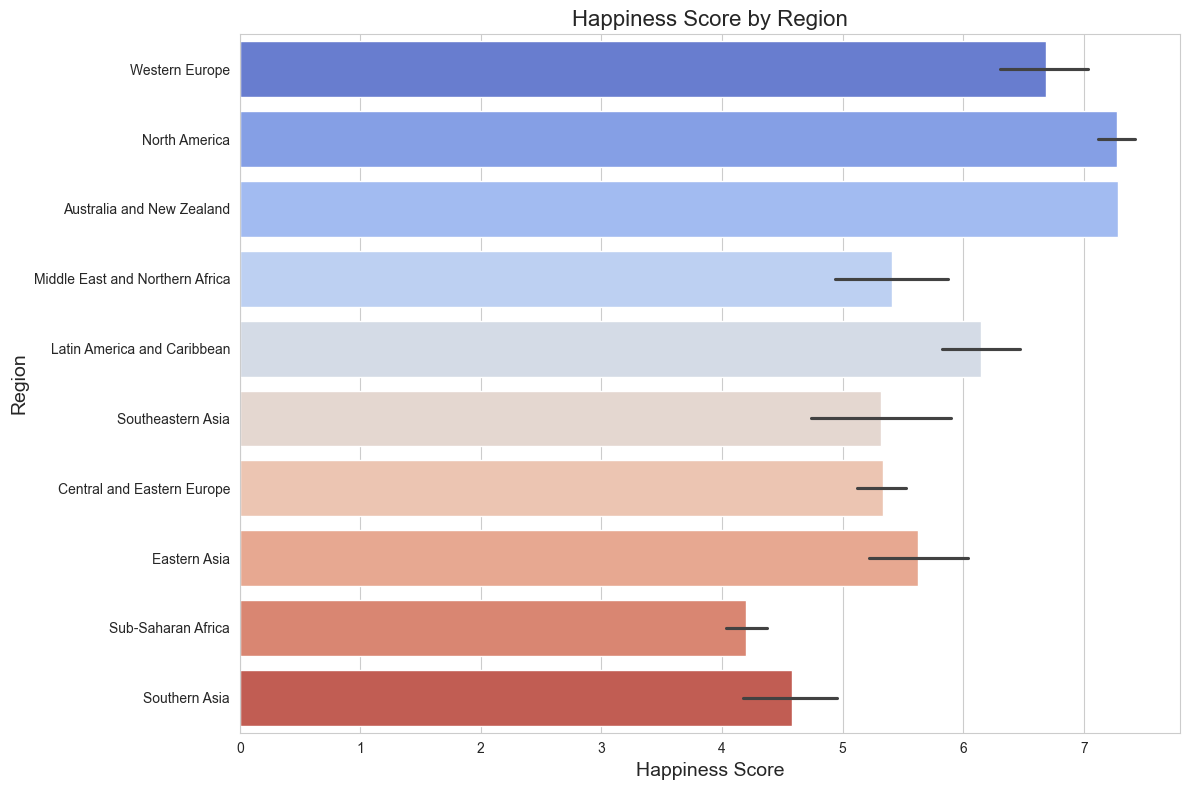

In [63]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Happiness Score', y='Region', data=df2015, palette='coolwarm')
  # Label the Diagramm
plt.xlabel('Happiness Score', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.title('Happiness Score by Region', fontsize=16)
plt.tight_layout()
plt.show()


#### Does the Happiness Score changes over the Years

In [2]:
medium = [
    df2015.loc[:, 'Happiness Score'].mean(),
    df2016.loc[:, 'Happiness Score'].mean(),
    df2017.loc[:, 'Happiness.Score'].mean(),
    df2018.loc[:, "Score"].mean(),
    df2019.loc[:, "Score"].mean()
]
jahre = [2015,2016,2017,2018,2019]
dfmean = pd.DataFrame({'Year': jahre, 'Mean Happiness Score': medium})   

dfmean

,Year,Mean Happiness Score
0,2015,5.375734
1,2016,5.382185
2,2017,5.354019
3,2018,5.375917
4,2019,5.407096


In [3]:
mittel30last = [
    df2015.loc[120:, 'Happiness Score'].mean(),
    df2016.loc[120:, 'Happiness Score'].mean(),
    df2017.loc[120:, 'Happiness.Score'].mean(),
    df2018.loc[120:, "Score"].mean(),
    df2019.loc[120:, "Score"].mean()
]
jahre = [2015,2016,2017,2018,2019]
dfmeanlast30 = pd.DataFrame({'Year': jahre, 'Mean Happiness Score': mittel30last}) 

#### The two lines are Plots, the Orange one is all Countrys included, the blue line only around the last 20 Countries to see if something chenge over a period of 5 Years (2015-2019)

Text(0.5, 1.0, 'Mean Happiness over the Years (Blue: lowest 20 countries, Orange: All countries)')

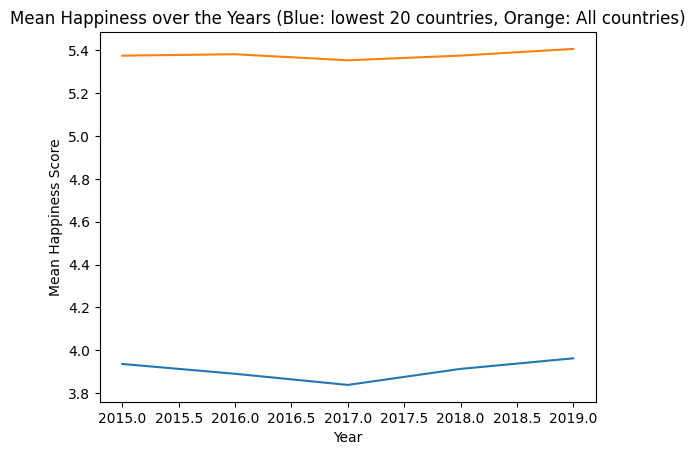

In [4]:
sns.lineplot(x="Year", y= "Mean Happiness Score", data= dfmeanlast30)
sns.lineplot(x="Year", y= "Mean Happiness Score", data= dfmean)
plt.title("Mean Happiness over the Years (Blue: lowest 20 countries, Orange: All countries)")

In [105]:
df2017 = df2017.rename(columns={'Happiness.Score': 'Happiness Score'})
df2018 = df2018.rename(columns={'Country or region': 'Country', "Score": "Happiness Score"})
df2019 = df2019.rename(columns={'Country or region': 'Country', "Score": "Happiness Score"})

#### The diagramm of the countries which were the happiness and which were the least happy in the five years of data

In [126]:

dflist = [df2015, df2016, df2017, df2018, df2019]
dfscores = pd.DataFrame()

for dataframe in dflist:
    if dfscores.empty:
        dfscores = dataframe[['Country', 'Happiness Score']].copy()
        dfscores.rename(columns={'Happiness Score': 'Total Happiness Score'}, inplace=True)
    else:
        dfscores = pd.merge(dfscores, dataframe[['Country', 'Happiness Score']], on='Country', how='inner')
        dfscores['Total Happiness Score'] += dfscores['Happiness Score']
        dfscores.drop(columns=['Happiness Score'], inplace=True)

# Optionally, you can drop duplicate 'Country' entries
dfscores.drop_duplicates(subset=['Country'], inplace=True)

print(dfscores)


         Country  Total Happiness Score
0    Switzerland                 37.557
1        Iceland                 37.555
2        Denmark                 37.730
3         Norway                 37.705
4         Canada                 36.753
..           ...                    ...
136       Rwanda                 17.193
137        Benin                 19.505
138        Syria                 16.461
139      Burundi                 15.395
140         Togo                 17.721

[141 rows x 2 columns]


In [131]:
dfscores["Total Happiness Score"] =dfscores["Total Happiness Score"]/5

In [143]:
dfinish = dfscores.sort_values(by="Total Happiness Score", ascending=False)

/var/folders/3f/n2rwh49d413bhwkgtvznx7qc0000gn/T/ipykernel_2390/618742568.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Happiness Score", y='Country', data=dfcountries, palette='coolwarm')


<Axes: xlabel='Total Happiness Score', ylabel='Country'>

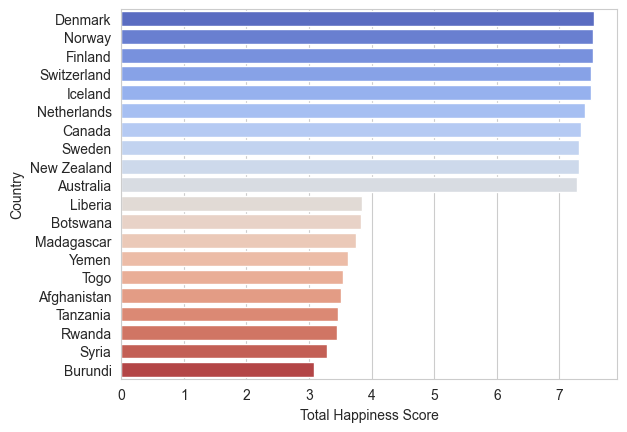

In [145]:
dfcountries = pd.concat([dfinish.head(10), dfinish.tail(10)])
sns.barplot(x="Total Happiness Score", y='Country', data=dfcountries, palette='coolwarm')

#### Conclusion, Denmark was the happiest and Burundi the least happiest in the years of 2015-2019